In [7]:
"""  An Institution wishes to find out their student’s ability in mathematics, reading and writing skills. 
     The Institution wants to do an exploratory study to check the following information.
     a.Find out how many males and females participated in the test.
     b.What do you think about the students' parental level of education?
     c.Who scores the most on average for math, reading and writing based on
       i. Gender
       ii.Test preparation course
     d.What do you think about the scoring variation for math, reading and writing based on
       i. Gender
       ii.Test preparation course
     e.The management needs your help to give bonus points to the top 25% of students based on their math score, 
       so how will you help the management to achieve this.  """

### Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
## visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
df = pd.read_csv('Students_Performance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [11]:
df.shape

(1000, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [13]:
df.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [14]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### a. Find out how many males and females participated in the test.

In [15]:
df.gender.value_counts(ascending=True,dropna=False)

male      482
female    518
Name: gender, dtype: int64

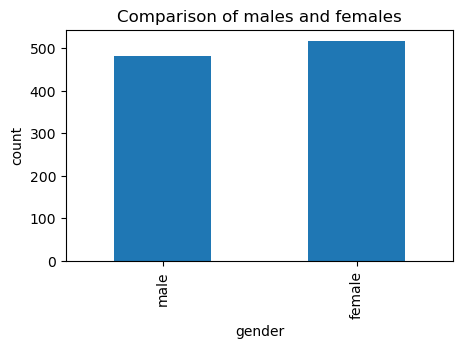

In [23]:
# visualising the number of male and females
df.gender.value_counts(ascending=True,dropna=False).plot.bar(figsize = (5,3))
plt.title('Comparison of males and females')
plt.xlabel('gender')
plt.ylabel('count')
plt.show();

### b. What do you think about the students' parental level of education?

In [13]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

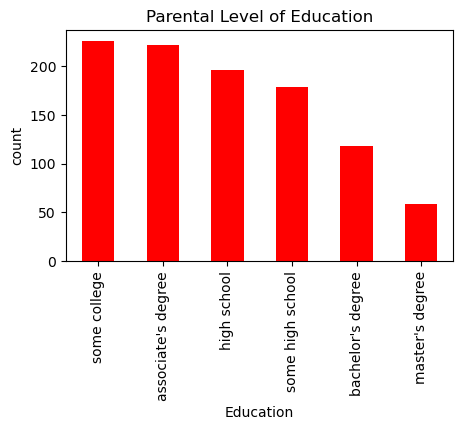

In [27]:
df['parental level of education'].value_counts().plot.bar(color='red',figsize = (5,3))
plt.title('Parental Level of Education')
plt.xlabel('Education')
plt.ylabel('count')
plt.show();

### c. Who scores the most on average for math, reading and writing based on
####   i. Gender
####   ii.Test preparation course

In [17]:
## based on gender
df[['math score','reading score','writing score','gender']].groupby('gender').mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


In [18]:
## based on test preparation course
df[['math score','reading score','writing score','test preparation course']].groupby('test preparation course').mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


### d. What do you think about the scoring variation for math, reading and writing based on
####   i.  Gender
####   ii. Test preparation course

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8020\2630292342.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["gender"]).mean().plot.bar()


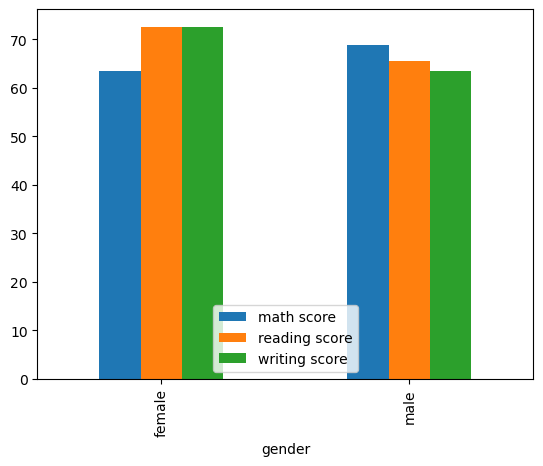

In [28]:
# Average score variation based on gender

df.groupby(["gender"]).mean().plot.bar()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8020\105614941.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8020\105614941.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8020\105614941.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


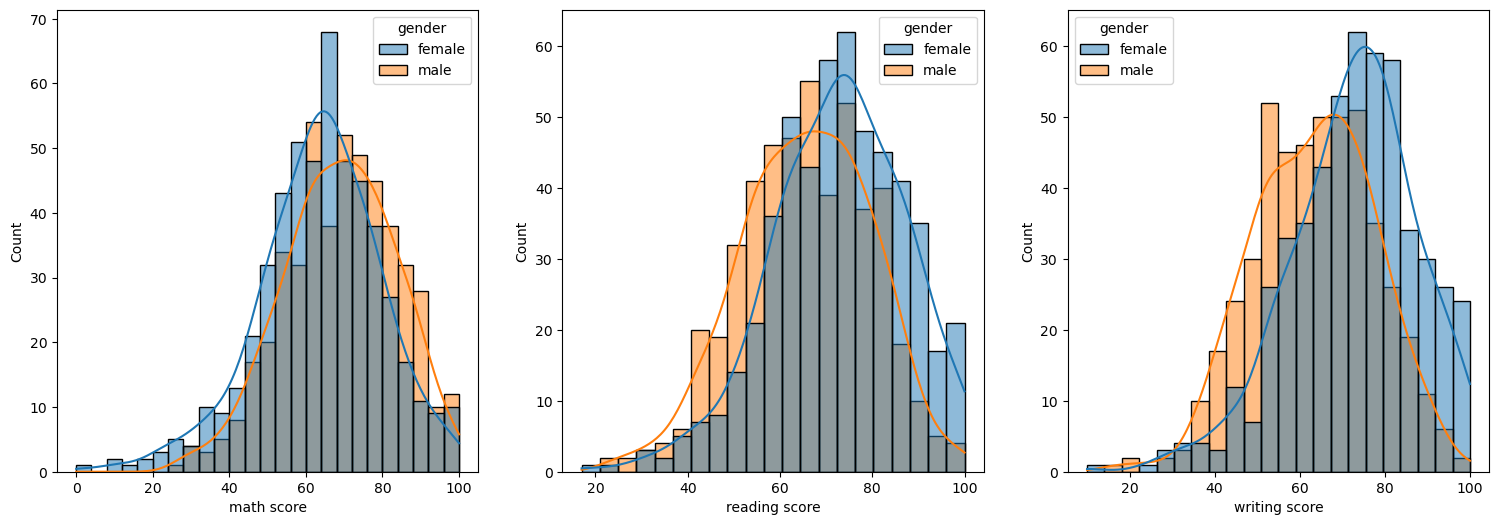

In [29]:
## All score variation based on gender

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='math score',kde=True, hue='gender')
plt.subplot(142)
sns.histplot(data=df,x='reading score',kde=True, hue='gender')
plt.subplot(143)
sns.histplot(data=df,x='writing score',kde=True, hue='gender')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8020\2336941307.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(df['test preparation course']).mean().plot.bar()


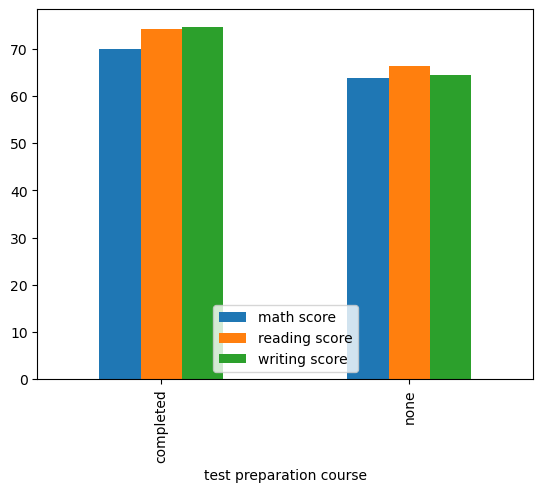

In [33]:
# Average score variation based on Test preparation score

df.groupby(df['test preparation course']).mean().plot.bar()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8020\3303445583.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8020\3303445583.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8020\3303445583.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


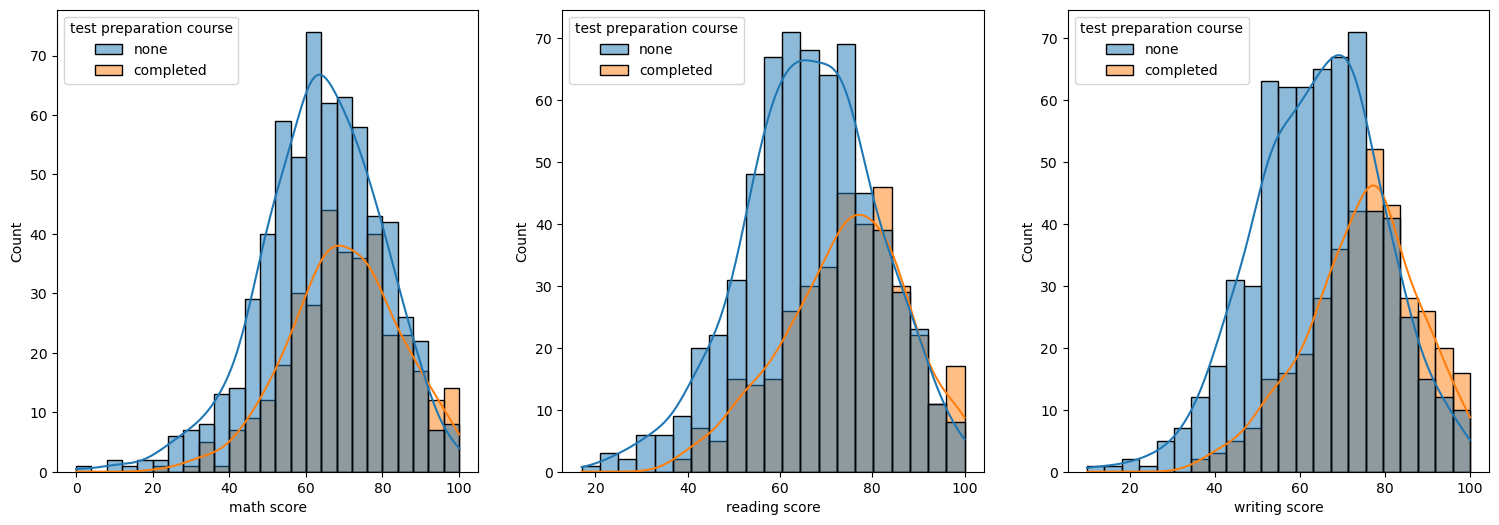

In [25]:
## All Test Preparation course

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='math score',kde=True, hue=df['test preparation course'])
plt.subplot(142)
sns.histplot(data=df,x='reading score',kde=True, hue=df['test preparation course'])
plt.subplot(143)
sns.histplot(data=df,x='writing score',kde=True, hue=df['test preparation course'])
plt.show()

### e. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [34]:
top = df.sort_values(by = 'math score', ascending = False)[['gender','race/ethnicity','test preparation course','math score']]

In [43]:
top.head(250)

,gender,race/ethnicity,test preparation course,math score
999,male,group E,completed,100
996,male,group A,completed,100
515,female,group E,none,100
517,female,group E,none,100
516,female,group E,none,100
...,...,...,...,...
856,male,group E,completed,77
855,male,group E,completed,77
854,male,group D,completed,77
853,male,group D,none,77
